# 5. How to Finalize the Model and Make Predictions

- First, we will finalize our model by fitting a model on the entire training dataset and saving the model to file for later use. 
- Second, We will then load the model and evaluate its performance on the hold out test dataset, to get an idea of how well the chosen model actually performs in practice.
- Finally, we will use the saved model to make a prediction on a single image.

## Save Final Model
A final model is typically fit on all available data, such as the combination of all train and test dataset.

In this tutorial, we will demonstrate the final model fit only on the just training dataset to keep the example simple.

The first step is to fit the final model on the entire training dataset.

```python

# fit model
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
```

Once fit, we can save the final model to an H5 file by calling the save() function on the model and pass in the chosen filename.

```python

# save model
model.save('final_model.h5')
```

Note: saving and loading a Keras model requires that [the h5py library](https://www.h5py.org/) is installed on your workstation.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

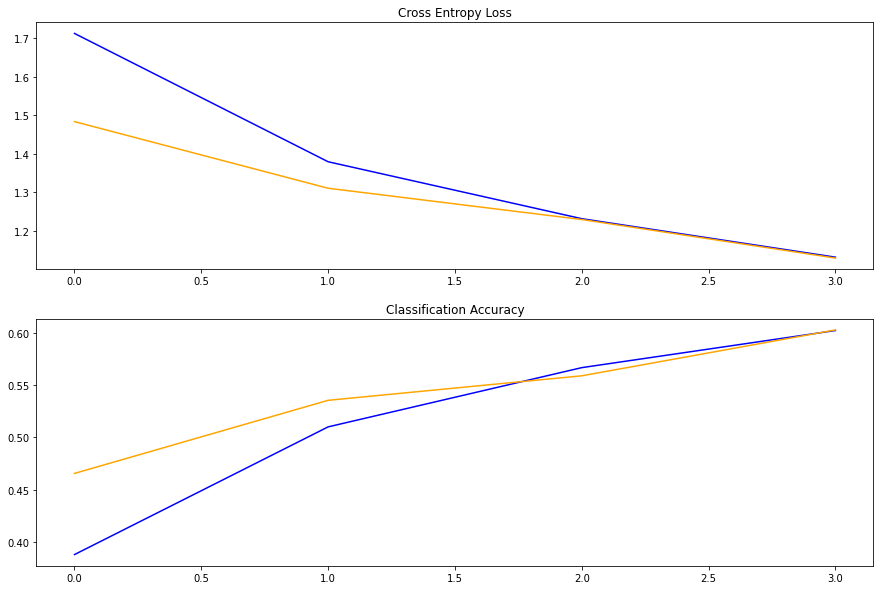

In [2]:
## Full code system:
# plot diagnostic learning curves
import matplotlib.pyplot as plt
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import sys

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def summarize_diagnostics(history, nametrain="ass"):
    # plot loss
    plt.figure(figsize=(15, 10))
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    # filename = "Image/VGG_img{}".format(nametrain)
    # plt.savefig(filename + '_plot.png')
    # plt.close()

def main():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=4, batch_size=64, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    # save model
    model.save('final_model.h5')
    
if __name__ == "__main__":
    main()

After running this example you will now have a 4.3-megabyte file with the name ‘final_model.h5‘ in your current working directory.

## Evaluate Final Model

We can now load the final model and evaluate it on the hold out test dataset.

This is something we might do if we were interested in presenting the performance of the chosen model to project stakeholders.

The test dataset was used in the evaluation and choosing among candidate models. As such, it would not make a good final test hold out dataset. Nevertheless, we will use it as a hold out dataset in this case.

The model can be loaded via the **load_model()** function.

The complete example of loading the saved model and evaluating it on the test dataset is listed below.

In [3]:
## Full code system:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
import sys

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

def main():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = load_model('final_model.h5')
       # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    
if __name__ == "__main__":
    main()

> 60.250


## Make Prediction

We can use our saved model to make a prediction on new images.

The model assumes that new images are color, they have been segmented so that one image contains one centered object, and the size of the image is square with the size 32×32 pixels.

Below is an image extracted from the CIFAR-10 test dataset. You can save it in your current working directory with the filename ‘sample_image.png‘.

- [Download the Deer Image (sample_image.png)](https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image-1.png)

We will pretend this is an entirely new and unseen image, prepared in the required way, and see how we might use our saved model to predict the integer that the image represents.

For this example, we expect class “4” for “Deer“.

First, we can load the image and force it to the size to be 32×32 pixels. The loaded image can then be resized to have a single channel and represent a single sample in a dataset. The load_image() function implements this and will return the loaded image ready for classification.

Importantly, the pixel values are prepared in the same way as the pixel values were prepared for the training dataset when fitting the final model, in this case, normalized.

```python
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
```

Next, we can load the model as in the previous section and call the predict_classes() function to predict the object in the image.

```python
# predict the class
result = model.predict_classes(img)
```

In [9]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('testimage/sample_image-1.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict(img)
    indexvalue = np.argmax(result[0])
    if indexvalue == 4:
        print("Deer: True")
    else:
        print("Deer: False")

# entry point, run the example
run_example()

Deer: True


## Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

- Pixel Scaling. Explore alternate techniques for scaling the pixels, such as centering and standardization, and compare performance.
- Learning Rates. Explore alternate learning rates, adaptive learning rates, and learning rate schedules and compare performance.
- Transfer Learning. Explore using transfer learning, such as a pre-trained VGG-16 model on this dataset.

If you explore any of these extensions, I’d love to know.
Post your findings in the comments below.

## Summary

In this tutorial, you discovered how to develop a convolutional neural network model from scratch for object photo classification.

Specifically, you learned:

- How to develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task.
- How to explore extensions to a baseline model to improve learning and model capacity.
- How to develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.
